In [18]:
from sklearn import datasets
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [19]:
diabetes = datasets.load_diabetes()

In [20]:
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [21]:
df["Output"]=diabetes.target

In [22]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Output    0
dtype: int64

         age   sex   bmi    bp    s1    s2    s3    s4    s5    s6  Output
age     1.00  0.17  0.19  0.34  0.26  0.22 -0.08  0.20  0.27  0.30    0.19
sex     0.17  1.00  0.09  0.24  0.04  0.14 -0.38  0.33  0.15  0.21    0.04
bmi     0.19  0.09  1.00  0.40  0.25  0.26 -0.37  0.41  0.45  0.39    0.59
bp      0.34  0.24  0.40  1.00  0.24  0.19 -0.18  0.26  0.39  0.39    0.44
s1      0.26  0.04  0.25  0.24  1.00  0.90  0.05  0.54  0.52  0.33    0.21
s2      0.22  0.14  0.26  0.19  0.90  1.00 -0.20  0.66  0.32  0.29    0.17
s3     -0.08 -0.38 -0.37 -0.18  0.05 -0.20  1.00 -0.74 -0.40 -0.27   -0.39
s4      0.20  0.33  0.41  0.26  0.54  0.66 -0.74  1.00  0.62  0.42    0.43
s5      0.27  0.15  0.45  0.39  0.52  0.32 -0.40  0.62  1.00  0.46    0.57
s6      0.30  0.21  0.39  0.39  0.33  0.29 -0.27  0.42  0.46  1.00    0.38
Output  0.19  0.04  0.59  0.44  0.21  0.17 -0.39  0.43  0.57  0.38    1.00


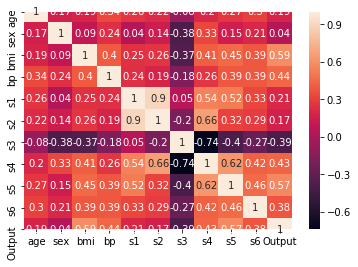

In [23]:

correlation_matrix = df.corr().round(2)
print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [24]:
#X = df.iloc[:,:-1]
X = pd.DataFrame(np.c_[df['bmi'], df['s5'], df['age'],df['sex'],df['s6'],df['bp']], columns = ['bmi','s5','age','sex','s6','bp'])
Y = df['Output']
#X = pd.DataFrame(np.c_[df['bmi'], df['s5']], columns = ['bmi','s5'])
Y = df['Output']

In [25]:
X

,bmi,s5,age,sex,s6,bp
0,0.061696,0.019908,0.038076,0.050680,-0.017646,0.021872
1,-0.051474,-0.068330,-0.001882,-0.044642,-0.092204,-0.026328
2,0.044451,0.002864,0.085299,0.050680,-0.025930,-0.005671
3,-0.011595,0.022692,-0.089063,-0.044642,-0.009362,-0.036656
4,-0.036385,-0.031991,0.005383,-0.044642,-0.046641,0.021872
...,...,...,...,...,...,...
437,0.019662,0.031193,0.041708,0.050680,0.007207,0.059744
438,-0.015906,-0.018118,-0.005515,0.050680,0.044485,-0.067642
439,-0.015906,-0.046879,0.041708,0.050680,0.015491,0.017282
440,0.039062,0.044528,-0.045472,-0.044642,-0.025930,0.001215


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 6)
(89, 6)
(353,)
(89,)


In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ls = Lasso(alpha=0.1) #a higher value of alpha restricts the coefficients further
ls.fit(X_train,Y_train)
Y_pred_train = ls.predict(X_train) #predictions on training data
Y_pred = ls.predict(X_test) #predictions on testing data


In [28]:
rmsetraining = (np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

r2 = r2_score(Y_train, Y_pred_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmsetraining))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = ls.predict(X_test)
mse = mean_squared_error(Y_test,y_test_predict)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


print("Difference between training and Testing set")
print("--------------------------------------")
print('Difference of RMSE between training and testing for Lasso is {}'.format(rmsetraining-rmse))


The model performance for training set
--------------------------------------
RMSE is 55.13999026908367
R2 score is 0.4780012866746375


The model performance for testing set
--------------------------------------
MSE 3191.453078918943
RMSE is 56.49294716085312
R2 score is 0.49387369155618166
Difference between training and Testing set
--------------------------------------
Difference of RMSE between training and testing for Lasso is -1.3529568917694519


## Ridge

In [29]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=1) #a higher value of alpha restricts the coefficients further
model=rr.fit(X_train,Y_train)
Y_pred_train = rr.predict(X_train) #predictions on training data
Y_pred = rr.predict(X_test) #predictions on testing data


In [30]:
rmseRidgeTraining = (np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
r2 = r2_score(Y_train, Y_pred_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmseRidgeTraining))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = rr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mse = mean_squared_error(Y_test,y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print("Difference between training and Testing set")
print("--------------------------------------")
print("Difference between training and Testing Dataset RMS Calculated for Ridge {}".format(rmseRidgeTraining-rmse))

The model performance for training set
--------------------------------------
RMSE is 59.07180660223242
R2 score is 0.40090379496193007


The model performance for testing set
--------------------------------------
MSE 3763.461601014253
RMSE is 61.347058617461464
R2 score is 0.40315997760599254
Difference between training and Testing set
--------------------------------------
Difference between training and Testing Dataset RMS Calculated for Ridge -2.275252015229043


#### After checking RMSE value we found that the model works best for Linear Regression as  RMSE was calculated for training and Test Dataset but the model performed better as the error difference was quite low in Linear Regression. We will choose the best fit where model performed equally well for test dataset.

In [31]:
##Author- AISC1003_ASHISH_SHARMA_500188494